# Goal: Predict future temperature anomalies

# 1-Data exploration

In [ ]:
#Import the requirements libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
# Load the data
df=pd.read_csv("global_temperature_anomalies.csv",sep=",",header=1)

In [4]:
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.19,-0.25,-0.10,-0.17,-0.11,-0.22,-0.19,-0.11,-0.15,-0.24,-0.23,-.18,-.18,***,***,-0.12,-0.17,-0.21
1,1881,-0.20,-0.14,0.03,0.05,0.06,-0.19,0.00,-0.04,-0.15,-0.22,-0.19,-.07,-.09,-.10,-.18,0.04,-0.08,-0.19
2,1882,0.16,0.14,0.04,-0.17,-0.15,-0.23,-0.17,-0.07,-0.14,-0.24,-0.17,-.36,-.11,-.09,.07,-0.09,-0.16,-0.18
3,1883,-0.29,-0.37,-0.13,-0.18,-0.17,-0.08,-0.07,-0.14,-0.21,-0.11,-0.23,-.11,-.17,-.20,-.34,-0.16,-0.09,-0.19
4,1884,-0.13,-0.07,-0.36,-0.40,-0.34,-0.36,-0.30,-0.27,-0.27,-0.25,-0.34,-.31,-.28,-.27,-.11,-0.37,-0.31,-0.29


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    146 non-null    int64  
 1   Jan     146 non-null    float64
 2   Feb     146 non-null    float64
 3   Mar     146 non-null    float64
 4   Apr     146 non-null    float64
 5   May     146 non-null    float64
 6   Jun     146 non-null    float64
 7   Jul     146 non-null    float64
 8   Aug     146 non-null    float64
 9   Sep     146 non-null    float64
 10  Oct     146 non-null    float64
 11  Nov     146 non-null    float64
 12  Dec     146 non-null    object 
 13  J-D     146 non-null    object 
 14  D-N     146 non-null    object 
 15  DJF     146 non-null    object 
 16  MAM     146 non-null    float64
 17  JJA     146 non-null    float64
 18  SON     146 non-null    float64
dtypes: float64(14), int64(1), object(4)
memory usage: 21.8+ KB


# Data cleaning

In [ ]:
# Convert '***' to NaN and make everything numeric
cols_to_fix = df.columns.drop('Year')
df[cols_to_fix] = df[cols_to_fix].apply(pd.to_numeric, errors='coerce')

#  the gloab warming Trend 

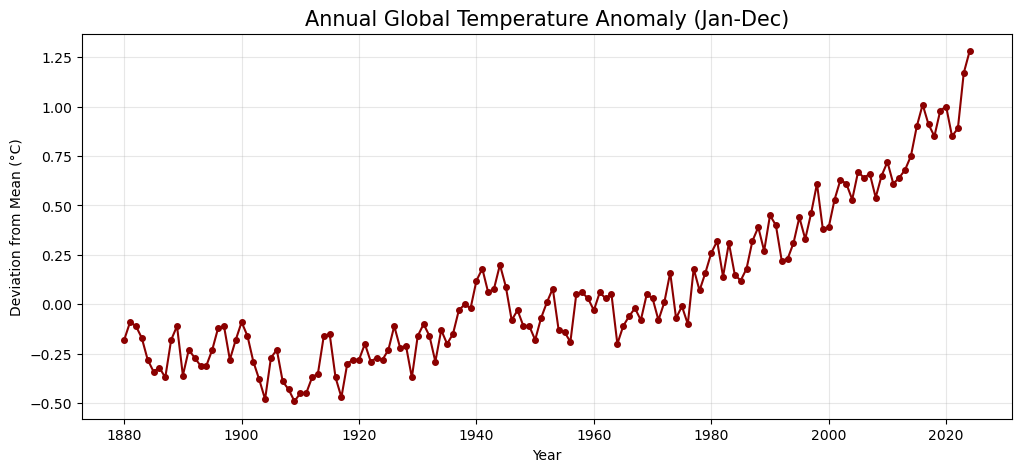

In [8]:
plt.figure(figsize=(12, 5))
plt.plot(df['Year'], df['J-D'], marker='o', color='darkred', markersize=4)
plt.title('Annual Global Temperature Anomaly (Jan-Dec)', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Deviation from Mean (°C)')
plt.grid(True, alpha=0.3)
plt.show()

# Seasonal Comparison

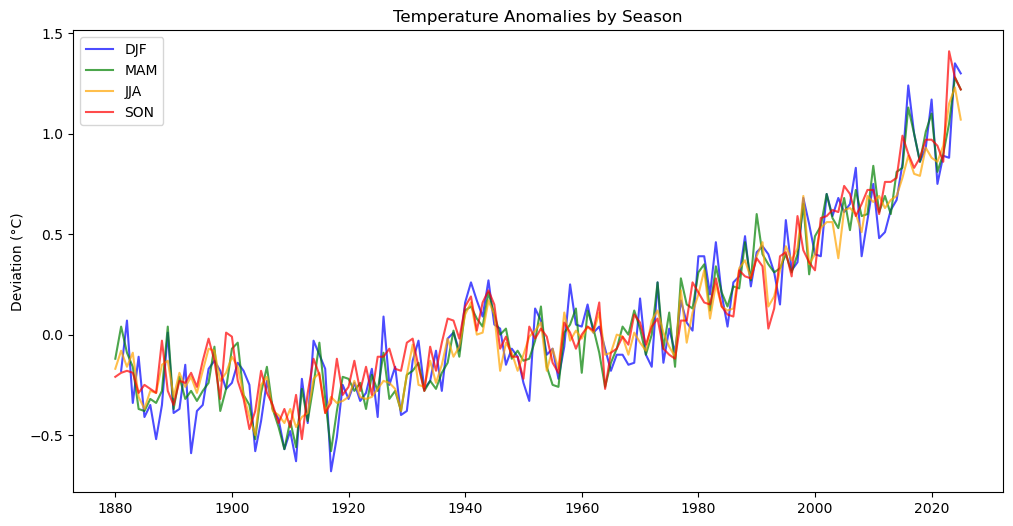

In [9]:
plt.figure(figsize=(12, 6))
seasons = ['DJF', 'MAM', 'JJA', 'SON']
colors = ['blue', 'green', 'orange', 'red']

for season, color in zip(seasons, colors):
    plt.plot(df['Year'], df[season], label=season, color=color, alpha=0.7)

plt.title('Temperature Anomalies by Season')
plt.legend()
plt.ylabel('Deviation (°C)')
plt.show()

# Monthly Heatmap

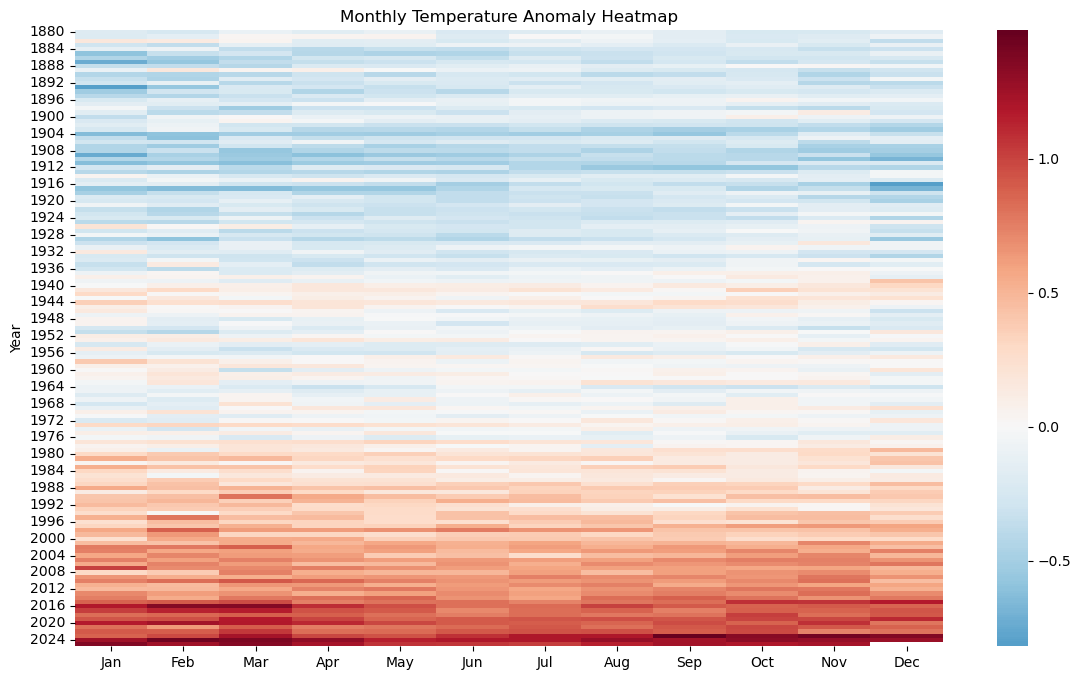

In [10]:
# Prepare the data for a heatmap (excluding the summary columns)
monthly_data = df.set_index('Year').iloc[:, 0:12]

plt.figure(figsize=(14, 8))
sns.heatmap(monthly_data, cmap='RdBu_r', center=0, annot=False)
plt.title('Monthly Temperature Anomaly Heatmap')
plt.show()

In [ ]:
plt.figure(figsize=(12, 5))
# Create a color list: red for positive, blue for negative
colors = ['red' if x > 0 else 'blue' for x in df['J-D']]

plt.bar(df['Year'], df['J-D'], color=colors)
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Yearly Temperature Deviations (Red=Warm, Blue=Cold)')
plt.ylabel('Anomaly (°C)')
plt.show()

# Warming vs. Cooling 

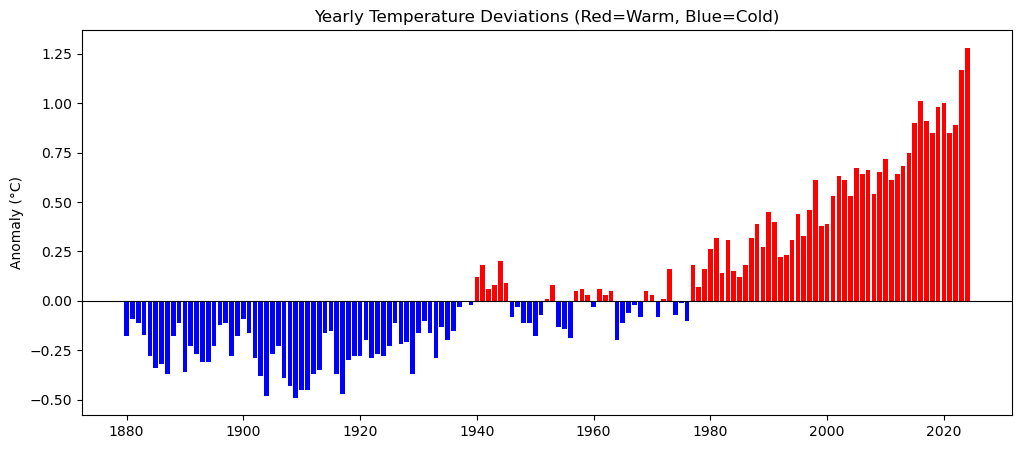

In [11]:
plt.figure(figsize=(12, 5))
# Create a color list: red for positive, blue for negative
colors = ['red' if x > 0 else 'blue' for x in df['J-D']]

plt.bar(df['Year'], df['J-D'], color=colors)
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Yearly Temperature Deviations (Red=Warm, Blue=Cold)')
plt.ylabel('Anomaly (°C)')
plt.show()

# Variance by Month

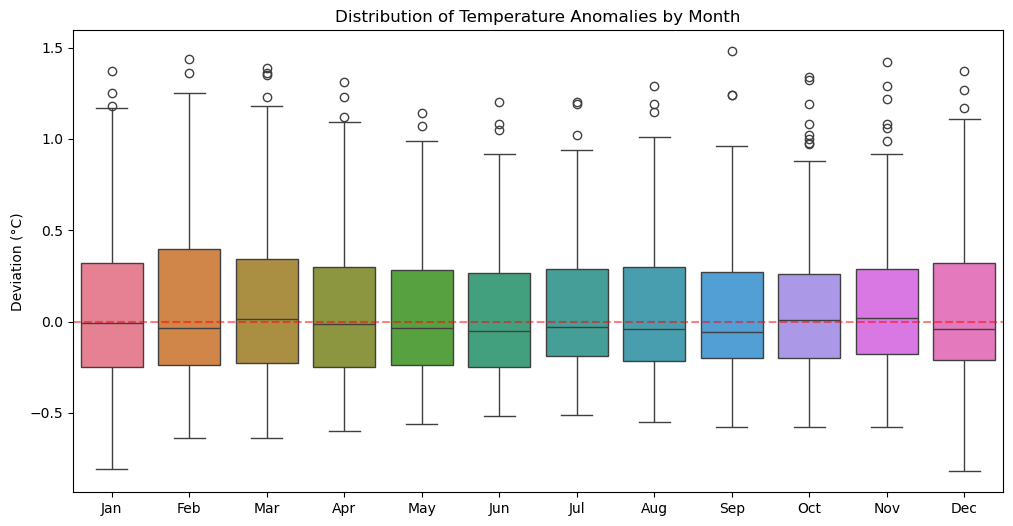

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, 1:13]) # Columns Jan through Dec
plt.title('Distribution of Temperature Anomalies by Month')
plt.ylabel('Deviation (°C)')
plt.axhline(0, color='red', linestyle='--', alpha=0.5)
plt.show()

# Density Plot

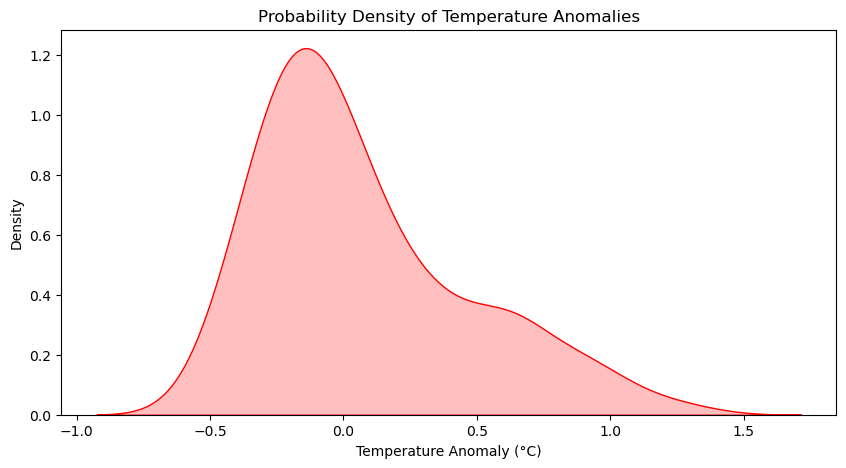

In [13]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['J-D'], fill=True, color="red")
plt.title('Probability Density of Temperature Anomalies')
plt.xlabel('Temperature Anomaly (°C)')
plt.show()

# The "Warming Stripes"

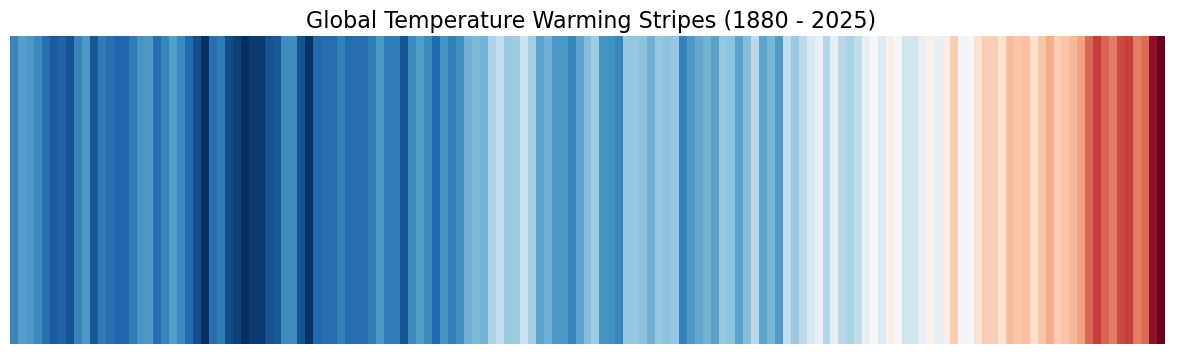

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Setup data
years = df['Year']
temp_anomalies = df['J-D'].values.reshape(1, -1)

plt.figure(figsize=(15, 4))
plt.imshow(temp_anomalies, cmap='RdBu_r', aspect='auto', 
           extent=[years.min(), years.max(), 0, 1])

plt.gca().set_axis_off() # Hide axes for the "Stripe" look
plt.title(f"Global Temperature Warming Stripes ({years.min()} - {years.max()})", fontsize=16)
plt.show()

# Rolling Average (Smoothing the Noise)